## Regression Splines 
Source : https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/?#


In [103]:
#import modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline




In [140]:
#read the dataset 
data = pd.read_csv('..\Data\Wage.csv')
data.head()

#data.to_csv('..\Data\Wage_temp.csv')

In [105]:
# consider age as indpendent and wage as dependent variables.
data_x = data['age']
data_y = data['wage']

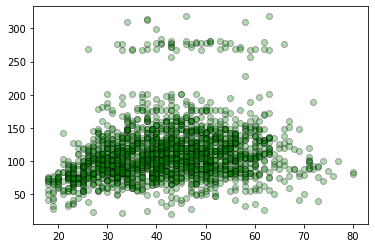

In [129]:
#dive the date into training and validation sets 
from sklearn.model_selection import train_test_split
data_x = pd.DataFrame(data_x, columns=['age'])
data_y = pd.DataFrame(data_y, columns=['wage'])


data_train_x, data_valid_x, data_train_y, data_valid_y = train_test_split(data_x, data_y, test_size=.33, random_state = 1)

plt.scatter(data_train_x, data_train_y, facecolor='green', edgecolor='k', alpha = 0.3)
plt.show()


In [107]:
from sklearn.linear_model import LinearRegression

def create_and_train_model(data, predictors, target, model_name, shouldPrintResult=False):
    model = None
    has_model_created = False
    
    if (model_name.lower()=='linear'):
        model = LinearRegression()
        model.fit(data[predictors], data[target])
        has_model_created = True 
    
    if (has_model_created and shouldPrintResult):
        print('Model- Intercept ==> %f'%model.intercept_)
        print('Model- coefficients ==>',model.coef_)
        
    return model
    #return

In [108]:
from sklearn.metrics import mean_squared_error
def evaluate_result(actual_y, predicted_y, method):
    error = None 
    
    if (method.lower() == 'rmse'):
        error = sqrt(mean_squared_error(actual_y, predicted_y))
        
    return error
        

In [109]:
#apply linear regression 
# reshape note : https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

from sklearn.linear_model import LinearRegression

linearModel = LinearRegression();

linearModel.fit(data_train_x, data_train_y)
#prepare the training dataset 
training_data_set = None 
training_data_set = data_train_x 
training_data_set['wage'] = data_train_y['wage']

#create and train the model
model = create_and_train_model(training_data_set,['age'], ['wage'], 'LINEAR', True)

#.iloc error rised..need to fix. 

Model- Intercept ==> 80.652877
Model- coefficients ==> [[0.72190831]]


C:\Users\henci\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


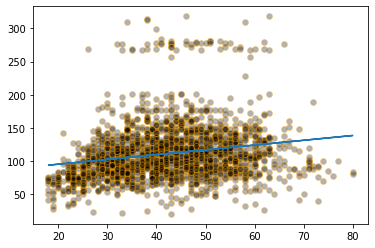

In [149]:
# visualize the linear regression result

#used the training dataset for prediction. 
#converted to numpy and reshaped

y_pred = model.predict(training_data_set['age'].to_numpy().reshape(-1,1))

plt.scatter(training_data_set['age'], training_data_set['wage'], facecolor='black', edgecolor='orange',alpha=0.3)
plt.plot(training_data_set['age'], y_pred)

In [150]:
#performance analysis of Linear Model
print('Linear Model : Intercept ==> ', linearModel.intercept_)
print('Linear Model : Coefficients ==> ', linearModel.coef_)

print('Linear Model : RMSE ==> ', evaluate_result(training_data_set['wage'].to_numpy(), y_pred, 'rmse'))
#print('Linear Model : RMSE ==> ', evaluate_result(training_data_set['wage'], y_pred, 'rmse'))

Linear Model : Intercept ==>  [80.65287741]
Linear Model : Coefficients ==>  [[0.72190831]]
Linear Model : RMSE ==>  41.15306394847772


### Imporved Linear Regression (Polynomial Regression)


In [187]:
#polynomial regression function 

#polyfit - fit the polynomial.  Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0. 
#polyfit function : https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

#poly1d - 1 dimensional polynomial class 
#poly1d function : https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html
def polynomial_regression(data, predictor, target, power):
    weights = np.polyfit(training_data_set['age'], training_data_set['wage'], power)

    #generte the model using the weights 
    polynomial_model = np.poly1d(weights)

#predict the values 
    polynomial_predicted_y = polynomial_model(training_data_set['age'])
    plt.scatter(training_data_set['age'], training_data_set['wage'], facecolor='orange', edgecolor='black', alpha=0.3)
    plt.plot(training_data_set['age'], polynomial_predicted_y,'.')
    plt.xlabel('age')
    plt.ylabel('wage')
    plt.title('Polynomial Regression - Power %d'%power)
    plt.show()
    

    #calcualte rmse 
    rmse = sqrt(mean_squared_error(training_data_set['wage'], polynomial_predicted_y))
    print('RMSE = ', rmse)
    


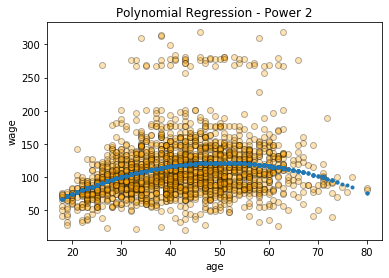

RMSE =  40.23330688335874


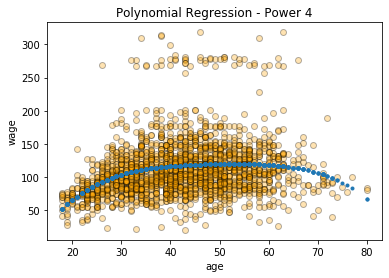

RMSE =  40.1479931919039


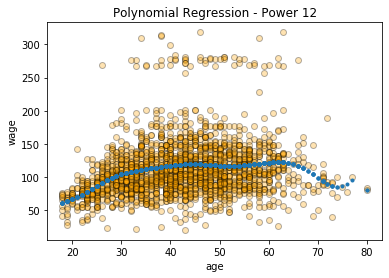

RMSE =  40.080626673591915


C:\Users\henci\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


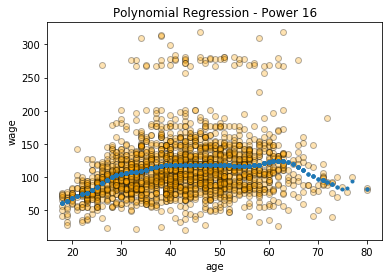

RMSE =  40.06846984768073


C:\Users\henci\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


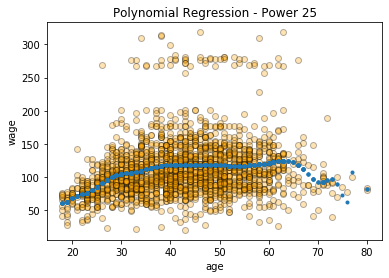

RMSE =  40.05864198631421


In [188]:
polynomial_regression(training_data_set, ['age'],['wage'], 2)
polynomial_regression(training_data_set, ['age'],['wage'], 4)
polynomial_regression(training_data_set, ['age'],['wage'], 12)
polynomial_regression(training_data_set, ['age'],['wage'], 16)
polynomial_regression(training_data_set, ['age'],['wage'], 25)

C:\Users\henci\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


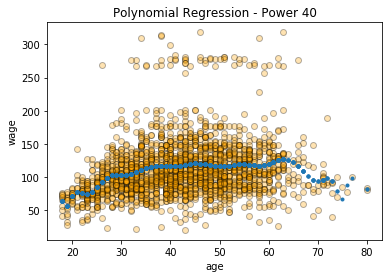

RMSE =  40.014045886542846


In [191]:
polynomial_regression(training_data_set, ['wage'], ['age'], 40)

###  Steph Functions

In [194]:
#divide the data into 4 bins 
df_cut, bins = pd.cut(training_data_set['age'],4, retbins=True, right=True)
df_cut.value_counts(sort=False)
#df_cut.count()
print(training_data_set['age'].min())
print(training_data_set['age'].max())
print(df_cut.head())
print(bins)


#df_cut, bins = pd.cut(train_x, 4, retbins=True, right=True)
#df_cut.value_counts(sort=False)

18
80
1382      (33.5, 49.0]
23        (33.5, 49.0]
2140      (49.0, 64.5]
1117    (17.938, 33.5]
933       (33.5, 49.0]
Name: age, dtype: category
Categories (4, interval[float64]): [(17.938, 33.5] < (33.5, 49.0] < (49.0, 64.5] < (64.5, 80.0]]
[17.938 33.5   49.    64.5   80.   ]


In [116]:
df_steps = pd.concat([training_data_set['age'], df_cut, training_data_set['wage']], keys=['age','age_cuts','wage'], axis=1)

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()


,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0


In [117]:
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80'] 

# Fitting Generalised linear models
generalized_linear_model = sm.GLM(df_steps.wage, df_steps_dummies).fit()



# Binning validation set into same 4 bins
bin_mapping = np.digitize(training_data_set['age'], bins) 
X_valid = pd.get_dummies(bin_mapping)

# Removing any outliers
X_valid = pd.get_dummies(bin_mapping).drop([5],axis=1)

# Prediction
pred2 = generalized_linear_model.predict(X_valid)





In [118]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(training_data_set['wage'], pred2)) 
print(rms) 


# We will plot the graph for 70 observations only
#xp = np.linspace(valid_x.min(),valid_x.max()-1,70) 
#bin_mapping = np.digitize(xp, bins) 
#X_valid_2 = pd.get_dummies(bin_mapping) 
#pred2 = fit3.predict(X_valid_2)


40.77822328671373


In [119]:
# We will plot the graph for 70 observations only
xp = np.linspace(data_valid_x.min(),data_valid_x.max()-1,70)
bin_mapping = np.digitize(xp, bins) 

#np.array(bin_mapping).reshape(-1,1)
df_bin_mapping = pd.DataFrame(bin_mapping, columns=['mapped'])
#X_valid_2 = pd.get_dummies( df_bin_mapping['mapped'].values).drop([5], axis=1)
X_valid_2 = pd.get_dummies( df_bin_mapping['mapped'].values)
#print(X_valid_2)
pred2 = generalized_linear_model.predict(X_valid_2)

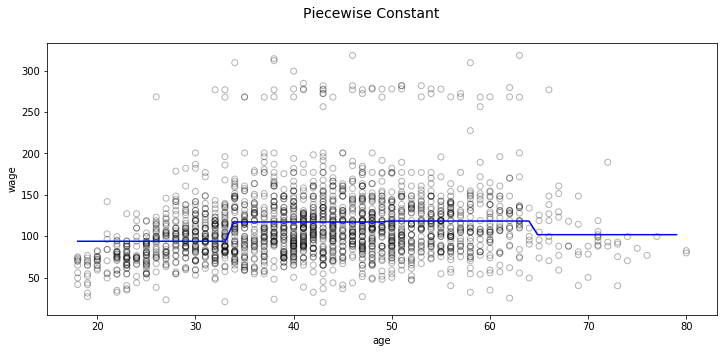

In [120]:
# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
#ax1.scatter(training_data_set['wage'], training_data_set['age'], facecolor='None', edgecolor='k', alpha=0.3)

ax1.scatter(training_data_set['age'], training_data_set['wage'], facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()

### Cubic Splines


In [196]:
from patsy import dmatrix
#test logic - current 
transformed_x = dmatrix("bs(training_data_set['age'], knots=(25,40,60), degree=3, include_intercept=False)",
                        {"training_data_set['age']": training_data_set['age']}, return_type='dataframe')
#print(transformed_x.head())
predTest = sm.GLM( training_data_set['wage'], transformed_x).fit()
predTest.params


# Specifying 3 knots
#transformed_x1 = dmatrix("bs(training_data_set['age'], knots=(25,40,60), degree=3, include_intercept=False)",
#                        {"training_data_set['age']": training_data_set['age']}, return_type='dataframe')





# Generate a sequence of age values spanning the range
age_grid = np.arange(training_data_set['age'].min(), training_data_set['age'].max()).reshape(-1,1)

# Make some predictions
pred1 = predTest.predict(dmatrix("bs(age_grid, knots=(25,40,60), include_intercept=False)",
                              {"age_grid": age_grid}, return_type='dataframe'))

In [198]:
#test logic 


# Specifying 3 knots
transformed_x1 = dmatrix("bs(training_data_set['age'], knots=(25,40,60), degree=3, include_intercept=False)",
                        {"training_data_set['age']": training_data_set['age']}, return_type='dataframe')

#print(transformed_x1)
# Build a regular linear model from the splines
fit1 = sm.GLM(training_data_set['wage'], transformed_x1).fit()
fit1.params
#Question : why params returns 6 groups 

Intercept                                                                                 62.649427
bs(training_data_set['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[0]    -0.366411
bs(training_data_set['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.265779
bs(training_data_set['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[2]    56.932451
bs(training_data_set['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[3]    57.604046
bs(training_data_set['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[4]    48.894006
bs(training_data_set['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[5]    -2.349816
dtype: float64

In [123]:
# Generate a sequence of age values spanning the range
age_grid = np.arange(training_data_set['age'].min(), training_data_set['age'].max()).reshape(-1,1)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(age_grid, knots=(25,40,60), include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))

print(pred1)

0     62.649427
1     63.330600
2     65.473437
3     68.755822
4     72.855638
        ...    
57    86.832949
58    81.234153
59    74.971802
60    68.006689
61    60.299611
Length: 62, dtype: float64


Spline1 - RMSE  40.13675217011758
Spline2 - RMSE  40.1041022058939


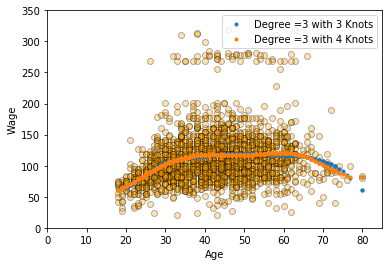

In [124]:
#working version

from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf 

#dmatrix - construct single design matrix based on the given formula
# The bs() function generates the entire matrix of basis functions for splines with the specified set of knots.
#Spline 1
# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(data, knots=(25,40,60), degree=3, include_intercept=False)", {"data":training_data_set['age']}, 
                        return_type='dataframe')
generalized_linear_model_spline1 = sm.GLM( training_data_set['wage'], transformed_x).fit()

#age_grid = np.arange(data_valid_x['age'].min(), data_valid_x['age'].max()).reshape(-1,1)
#predict the values
spline_prediction1 = generalized_linear_model_spline1.predict(
    dmatrix("bs(age_grid, knots=(25,40,60),  include_intercept=False)", {"age_grid":training_data_set['age']}, 
            return_type='dataframe'))

#calculate RMSE
spline1_rmse = sqrt(mean_squared_error(training_data_set['wage'],spline_prediction1))
print('Spline1 - RMSE ',spline1_rmse)


#Spline 2
transformed_x2 = dmatrix("bs(data, knots=(25,40,50,65), degree=3, include_intercept=False)",
                        {"data":training_data_set['age']}, return_type='dataframe')
#prepare the model
generalized_linear_model_spline2 = sm.GLM(training_data_set['wage'], transformed_x2).fit()

#predict the values 
spline_prediction2 = generalized_linear_model_spline2.predict(dmatrix("bs(data, knots=(25,40,50,65), include_intercept=False)", 
                                        {"data":training_data_set['age']}, return_type='dataframe'))

#calculate RMSE
spline2_rmse = sqrt(mean_squared_error(training_data_set['wage'], spline_prediction2))
print('Spline2 - RMSE ',spline2_rmse)

#plot the splines and error bands 

plt.scatter(training_data_set['age'], training_data_set['wage'], facecolor='orange', edgecolor='black', alpha=0.3)
plt.plot(training_data_set['age'], spline_prediction1, '.',label='Degree =3 with 3 Knots')
plt.plot(training_data_set['age'], spline_prediction2, '.',label='Degree =3 with 4 Knots')
plt.legend()
plt.xlim(0,85)
plt.ylim(0,350)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()


### Natural cubic spline 


Natural Spline RMSE -  40.298492053939576


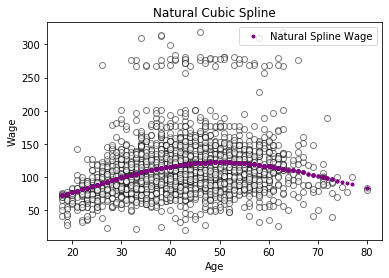

In [125]:
#Generting natural cubic spline
# cr function ? 
transformed_x3 = dmatrix("cr(train, df=3)", {"train": training_data_set['age']}, return_type='dataframe')
glm_naturl_cubic_spline = sm.GLM(training_data_set['wage'], transformed_x3).fit()

#predict the same training set
predict_natural_cubic_spline = glm_naturl_cubic_spline.predict(dmatrix("cr(data, df=3)", {"data": training_data_set['age']}, return_type='dataframe'))

#calculate rmse 
natural_cubic_spline_rmse = sqrt(mean_squared_error(training_data_set['wage'], predict_natural_cubic_spline))

print('Natural Spline RMSE - ',natural_cubic_spline_rmse)

plt.scatter(training_data_set['age'], training_data_set['wage'], facecolor='w', edgecolor='black', alpha=0.5)
plt.plot(training_data_set['age'], predict_natural_cubic_spline, '.', color='purple', label='Natural Spline Wage')
plt.title('Natural Cubic Spline')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.legend()